In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def square(x):
    return [1 if x < np.pi/4 else 0 for x in x]

def triangle(x):
    return [(1/np.pi)*x if x < np.pi else (-1/np.pi)*x + 2 for x in x]

def sawtooth(x):
    return 1 - 1/(2*np.pi) * x

points = 2000

x = np.linspace(0, np.pi*2, num=points)
y = square(x)
#y = triangle(x)
#y = sawtooth(x)

In [3]:
def FourierSeries(X, Y, n):
    coefficients = [0]* (2*n - 1)
    
    for x, y in zip(X, Y):

        for i, r in enumerate(range(-n+1, n)):
            coefficients[i] += y * np.e ** (-1j * r * x)
                    
    return [x /  len(X) for x in coefficients]
    

In [4]:
totalcoefficients = 2001
coefficients = FourierSeries(x, y, totalcoefficients)

In [5]:
n = 4
print(coefficients[totalcoefficients - n:totalcoefficients + n - 1])

[(0.03787691048575181+0.09038647399035071j), (0.0797875927715052+0.07934992074457803j), (0.11260065537108102+0.04645941419337051j), (0.125+0j), (0.11260065537108102-0.04645941419337051j), (0.0797875927715052-0.07934992074457803j), (0.03787691048575181-0.09038647399035071j)]


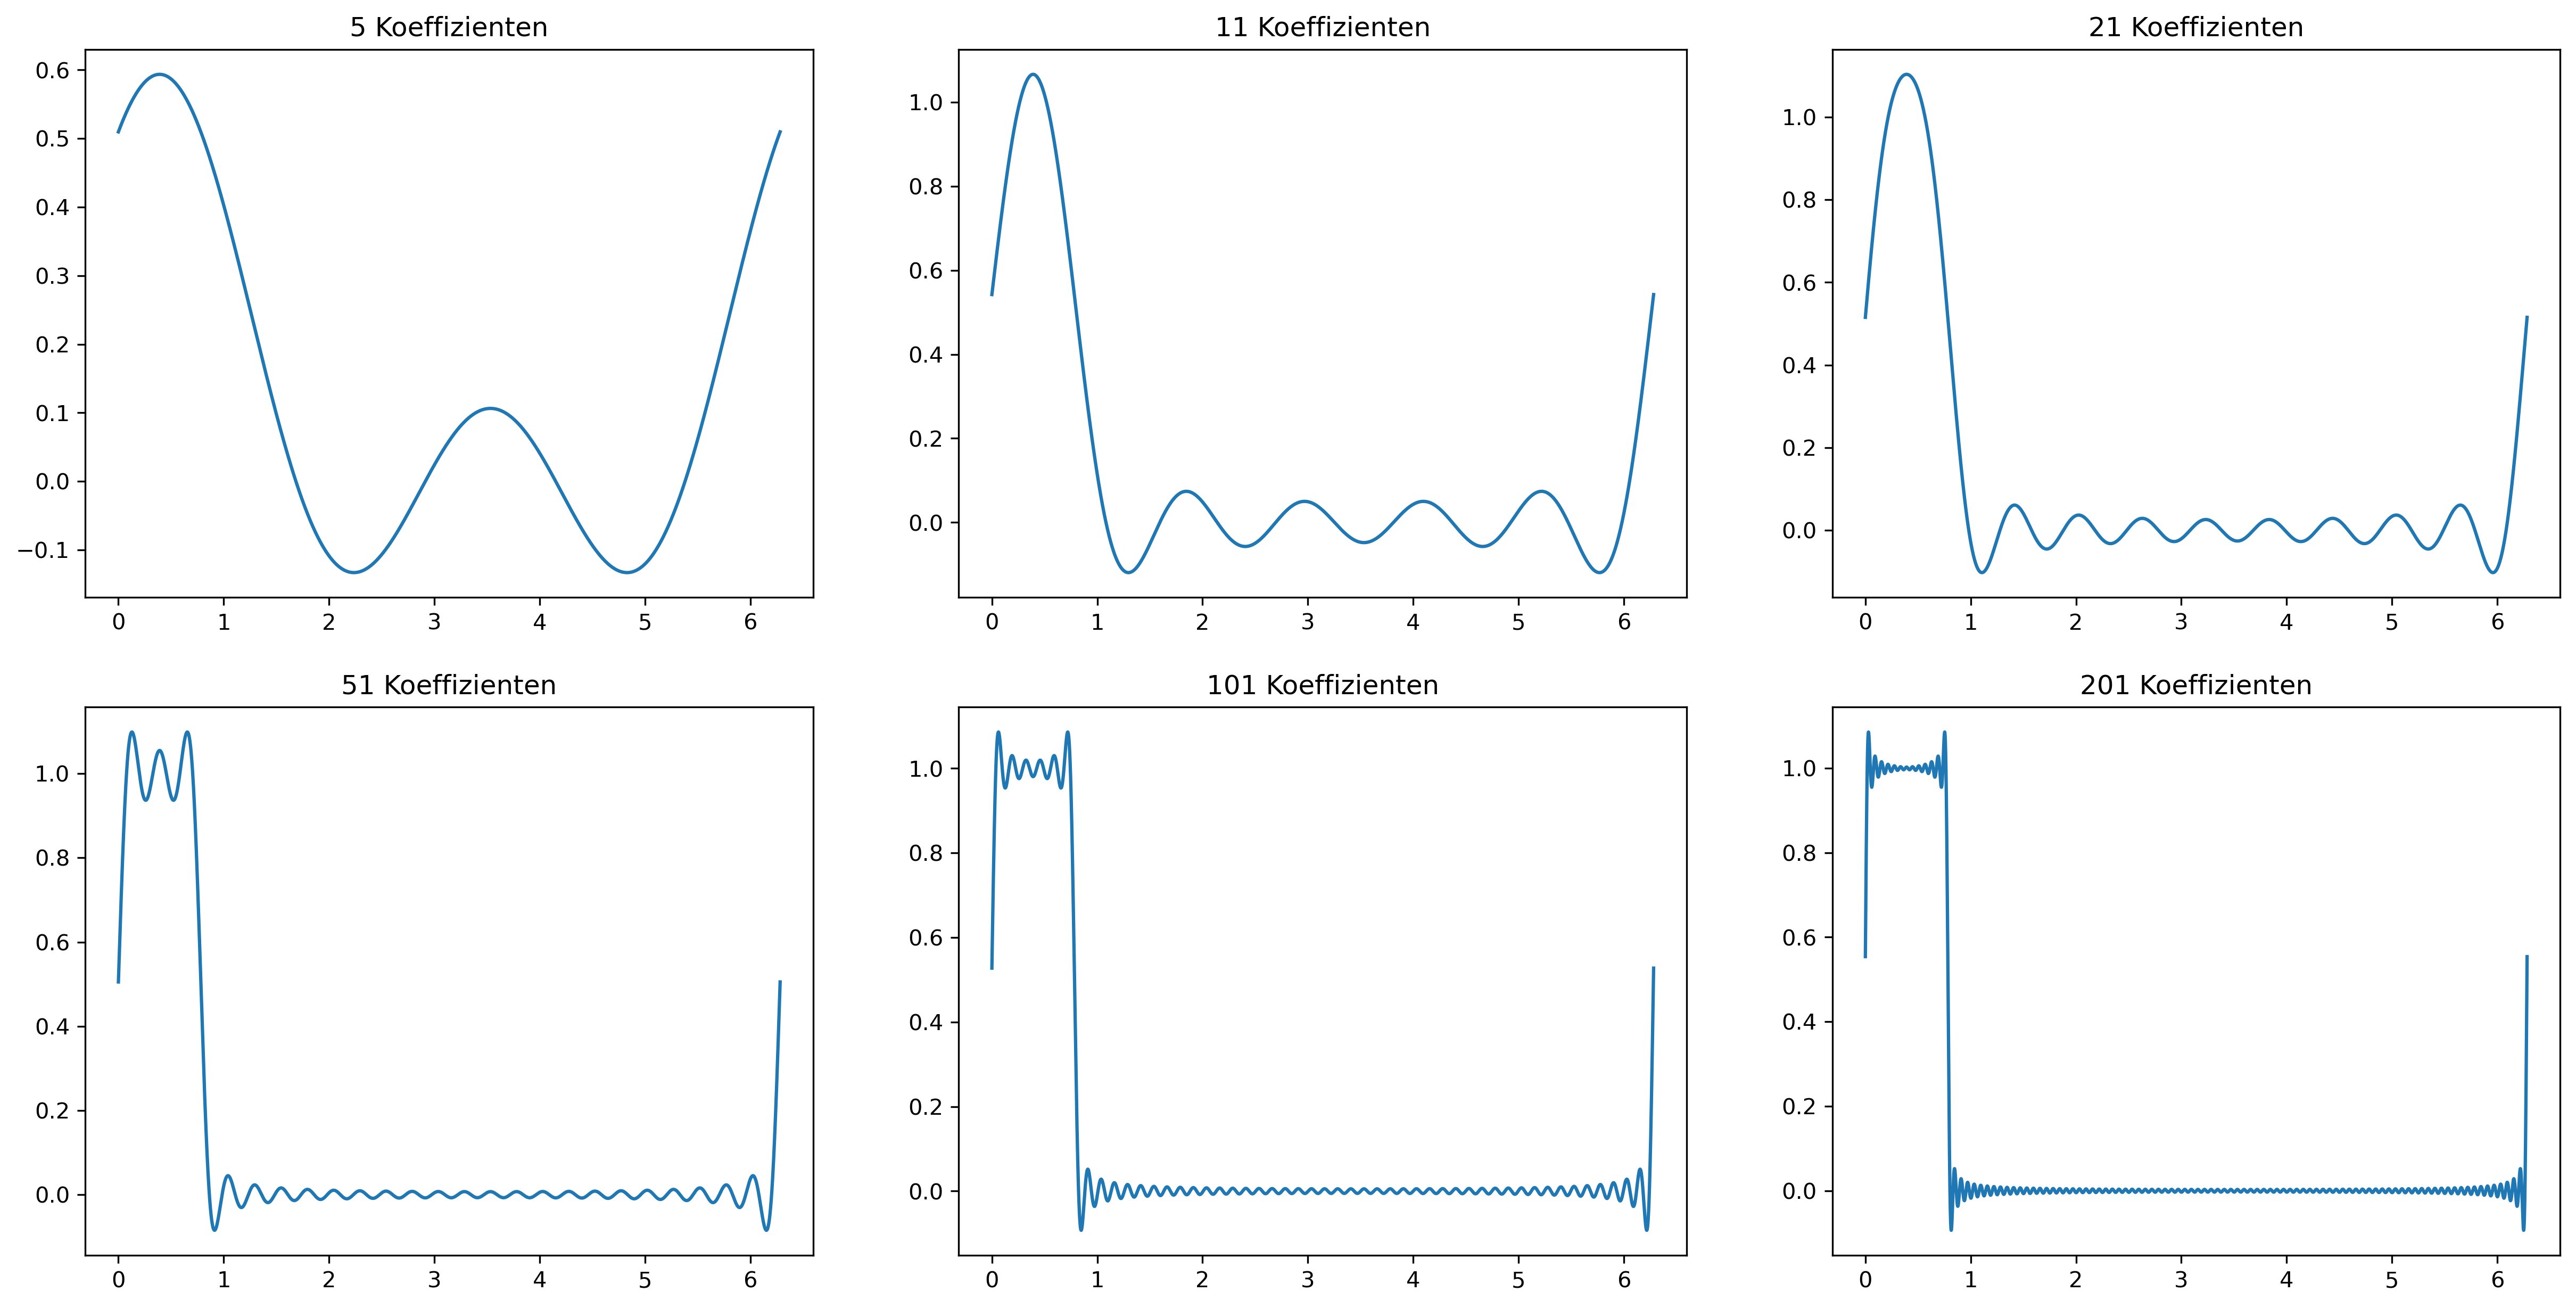

In [6]:
# Select Level of detail
sizes = ((3, 6, 11, 26),)
sizes = ((3, 6, 11),(26, 51, 101))
#sizes = ((6, 21, 51, 101, 251),)
#sizes = ((51, 251, 1001, 2001),)
#sizes = ((21, 101, 251), (501, 1001, 2001))

points = 20000

fig, axes = plt.subplots(len(sizes), len(sizes[0]), squeeze=False, figsize=[20,10], dpi=300)

for i in range(len(sizes)):
    for n, ax in zip(sizes[i], axes[i]):

        I = [sum([c * np.e ** (1j * r * x) for c, r in zip(coefficients[totalcoefficients - n:totalcoefficients + n - 1], range(-n+1, n))]) for x in np.linspace(0, np.pi*2, num=points)]
        X = [i.real for i in I]
        Y = [-i.imag for i in I]
        ax.set_title(f'{2*n -1} Koeffizienten')
        
        ax.plot(np.linspace(0, np.pi*2, num=points), X)


plt.show()